<h2 id="Contents">Contents<a href="#Contents"></a></h2>
        <ol>
        <li><a class="" href="#Imports">Imports</a></li>
<li><a class="" href="#The-API">The API</a></li>
<ol><li><a class="" href="#statsmodel.api">statsmodel.api</a></li>
</ol><li><a class="" href="#Getting-Started">Getting Started</a></li>
<ol><li><a class="" href="#Design-matrices-(endog-&amp;-exog)">Design matrices (endog & exog)</a></li>
<li><a class="" href="#Fitting-Model">Fitting Model</a></li>
<li><a class="" href="#Explaining-Various-Terms-in-the-Summary">Explaining Various Terms in the Summary</a></li>
<ol><li><a class="" href="#Model-and-Method">Model and Method</a></li>
<li><a class="" href="#DF-residuals-and-DF-model">DF residuals and DF model</a></li>
<li><a class="" href="#Covariance-type">Covariance type</a></li>
<li><a class="" href="#R-squared-and-Adj.-R-squared">R-squared and Adj. R-squared</a></li>
<li><a class="" href="#coef-and-std-err">coef and std err</a></li>
<li><a class="" href="#t-values-and-P%3E%7Ct%7C">t-values and P>|t|</a></li>
<li><a class="" href="#F-statistics">F-statistics</a></li>
<li><a class="" href="#Log-likelihood">Log-likelihood</a></li>
<li><a class="" href="#More">More</a></li>
</ol></ol><li><a class="" href="#Others">Others</a></li>
</ol>

# Imports

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# The API

`statsmodel` is composed of a number of submodules, from Linear models to time series analysis as well as statistical tools. 

The main statsmodels API is split into models:

1. `statsmodels.api`: Cross-sectional models and methods. Canonically imported using import `statsmodels.api` as `sm`.

2. `statsmodels.tsa.api`: Time-series models and methods. Canonically imported using import `statsmodels.tsa.api` as `tsa`.

3. `statsmodels.formula.api`: A convenience interface for specifying models using formula strings and DataFrames. This API directly exposes the `from_formula` class method of models that support the formula API. Canonically imported using import `statsmodels.formula.api` as `smf`.

Out of these, the first one is the most important one. It contains the main classes and functions for linear models. For details, follow the [link](https://www.statsmodels.org/dev/api.html).

## `statsmodel.api`

The module has classes for the following topics:
1. Regression
2. Imputation
3. Generalized Estimating Equations
4. Generalized Linear Models
5. Discrete and Count Models
6. Multivariate Models

Some models are:

**`OLS(endog[, exog, missing, hasconst])`**: Ordinary Least Squares

**`WLS(endog, exog[, weights, missing, hasconst])`**: Weighted Least Squares

**`GLS(endog, exog[, sigma, missing, hasconst])`**: Generalized Least Squares

**`GLSAR(endog[, exog, rho, missing, hasconst])`**: Generalized Least Squares with AR covariance structure

**`RecursiveLS(endog, exog[, constraints])`**: Recursive least squares

**`RollingOLS(endog, exog[, window, min_nobs, ...])`**: Rolling Ordinary Least Squares

**`RollingWLS(endog, exog[, window, weights, ...])`**: Rolling Weighted Least Squares

**`BayesGaussMI(data[, mean_prior, cov_prior, ...])`**: Bayesian Imputation using a Gaussian model.

**`GEE(endog, exog, groups[, time, family, ...])`**: Marginal Regression Model using Generalized Estimating Equations.

**`GLM(endog, exog[, family, offset, exposure, ...])`**: Generalized Linear Models

**`GLMGam(endog[, exog, smoother, alpha, ...])`**: Generalized Additive Models (GAM)

**`BinomialBayesMixedGLM(endog, exog, exog_vc, ...)`**: Generalized Linear Mixed Model with Bayesian estimation

**`Logit(endog, exog[, offset, check_rank])`**: Logit Model

**`Probit(endog, exog[, offset, check_rank])`**: Probit Model

**`MNLogit(endog, exog[, check_rank])`**: Multinomial Logit Model

**`QuantReg(endog, exog, **kwargs)`**: Quantile Regression

**`RLM(endog, exog[, M, missing])`**: Robust Linear Model

Apart from these, the module has some more tools related to graphics and statistics like:

**`ProbPlot(data[, dist, fit, distargs, a, ...])`**: Q-Q and P-P Probability Plots

**`qqline(ax, line[, x, y, dist, fmt])`**: Plot a reference line for a qqplot.

**`qqplot(data[, dist, distargs, a, loc, ...])`**: Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.

**`Description(data[, stats, numeric, ...])`**: Extended descriptive statistics for data

**`describe(data[, stats, numeric, ...])`**: Extended descriptive statistics for data

**`add_constant(data[, prepend, has_constant])`**: Add a column of ones to an array.

# Getting Started

We'll be using the *tips* dataset.

In [2]:
tips = pd.read_csv("tips.csv")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
tips["sex"] = tips["sex"].apply(lambda x: 0 if x=="Male" else 1)
tips["smoker"] = tips["smoker"].apply(lambda x: 0 if x=="No" else 1)
tips["time"] = tips["time"].apply(lambda x: 0 if x=="Dinner" else 1)

In [20]:
tips.drop("day", axis=1, inplace=True)

## Design matrices (endog & exog)

To fit most of the models covered by statsmodels, you will need to create two design matrices. The first is a matrix of endogenous variable(s) (i.e. dependent, response, regressand, etc.). The second is a matrix of exogenous variable(s) (i.e. independent, predictor, regressor, etc.). The OLS coefficient estimates are calculated as usual:
$$
\hat{\beta} = (X'X)^{-1} X'y
$$

In our case, all the columns other than the "tip" column, along with a column conaining just ones form the *endog* while the "tip" columns forms the *exog*.

Let's make these matrices:

## Fitting Model

In [21]:
y = tips["tip"]
X = tips.drop("tip", axis=1)
X = sm.add_constant(X)

Now, we can fit the model:

In [23]:
model = sm.OLS(y, X)
result = model.fit()

Let's see the summary:

In [24]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     42.00
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           6.57e-31
Time:                        15:12:15   Log-Likelihood:                -347.78
No. Observations:                 244   AIC:                             707.6
Df Residuals:                     238   BIC:                             728.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6971      0.225      3.100      0.0

The `result` object has many useful attributes. For example, we can extract parameter estimates and r-squared by typing:

In [25]:
result.params

const         0.697142
total_bill    0.094068
sex           0.028111
smoker       -0.083902
time         -0.004947
size          0.180274
dtype: float64

In [26]:
result.rsquared

0.46876846977091013

## Explaining Various Terms in the Summary

### Model and Method

OLS which stands for Ordinary Least Square. The model tries to find out a linear expression for the dataset which minimizes the sum of residual squares.

### DF residuals and DF model

We have total 244 observation and 6 features. Out of 6 features, 5 features are independent. DF Model is therefore 5. DF residual is calculated from total observation-DF model-1 which is 244-5-1 = 238 in our case.

### Covariance type

Covariance type is typically nonrobust which means there is no elimination of data to calculate the covariance between features. Covariance shows how two variables move with respect to each other. If this value is greater than 0, both move in same direction and if this is less than 0, the variables mode in opposite direction. Covariance is difference from correlation. Covariance does not provide the strength of the relationship, only the direction of movement whereas, correlation value is normalized and ranges between -1 to +1 and correlation provides the strength of relationship. 

###  R-squared and Adj. R-squared

R-squared value is the coefficient of determination which indicates the percentage of the variability if the data explained by the selected independent variables.

As we add more and more independent variables to our model, the R-squared values increases but in reality, those variables do not necessarily make any contribution towards explaining the dependent variable. Therefore addition of each unnecessary variables needs some sort of penalty. The original R-squared values is adjusted when there are multiple variables incorporated. In essence, we should always look for adjusted R-squared value while performing multiple linear regression. For a single independent variable, both R-squared and adjusted R-squared value are same.

### coef and std err

The coef column represents the coefficients for each independent variable along with intercept value. Std err is the standard deviation of the corresponding variable’s coefficient across all the data points.

### t-values and P>|t|

The t-column provides the t-values corresponding to to each independent variables. T-statistics are used to calculate the p-values. Typically when p-value is less than 0.05, it indicates a strong evidence against null hypothesis which states that the corresponding independent variable has no effect on the dependent variable.

P-value of 0.042 for size says that there is 4.2% size has no effect on tip. total_bill has p-value of zero. These two tells that we can reject the null hypothesis and say that tips is highly dependent on total_bill and tip.

### F-statistics

F-test provides a way to check all the independent variables all together if any of those are related to the dependent variable. If Prob(F-statistic) is greater than 0.05, there is no evidence of relationship between any of the independent variable with the output. If it is less than 0.05, we can say that there is at least one variable which is significantly related with the output. In our example, the p-value is less than 0.05 and therefore, one or more than one of the independent variable are related to output variable.

However, there may be some cases when prob(F-statistic) may be greater than 0.05 but one of the independent variable shows strong correlation. This is because each t-test is carried out with different set of data whereas F-test checks the combined effect including all variables globally.

### Log-likelihood

The log-likelihood value is a measure for fit of the model with the given data. It is useful when we compare two or more models. The higher the value of log-likelihood, the better the model fits the given data. It can range from negative infinity to positive infinity.

### More

**AIC and BIC:** AIC (stands for Akaike’s Information Criteria developed by Japanese statistician Hirotugo Akaike) and BIC (stands for Bayesian Information Criteria) are also used as criteria for model robustness. The goal is to minimize these values to get a better model.

**Omnibus and Prob(Omnibus):** Omnibus test checks the normality of the residuals once the model is deployed. If the value is zero, it means the residuals are perfectly normal. Here, in the example prob(Omnibus) is 0.0 indicating that there is 0% chance that the residuals the normally distributed. For a model to be robust, besides checking R-squared and other rubrics, the residual distribution is also required to be normal ideally.

**Skew and Kurtosis:** Skew values tells us the skewness of the residual distribution. Normally distributed variables have 0 skew values. Kurtosis is a measure of light-tailed or heavy-tailed distribution compared to normal distribution. High kurtosis indicates the distribution is too narrow and low kurtosis indicates the distribution is too flat. A kurtosis value between -2 and +2 is good to prove normalcy.

**Durbin-Watson:** Durbin-Watson statistic provides a measure of autocorrelation in the residual. If the residual values are autocorrelated, the model becomes biased and it is not expected. This simply means that one value should not be depending on any of the previous values. An ideal value for this test ranges from 0 to 4.

# Others

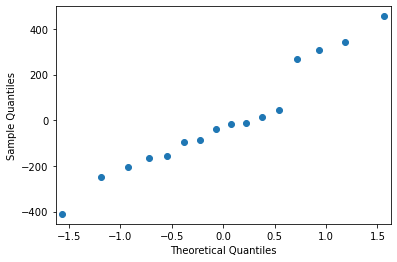

In [28]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
data = sm.datasets.longley.load()
exog = sm.add_constant(data.exog)
mod_fit = sm.OLS(data.endog, exog).fit()
res = mod_fit.resid # residuals
fig = sm.qqplot(res)
plt.show()

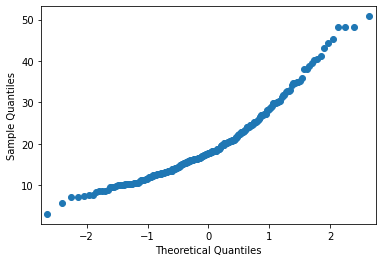

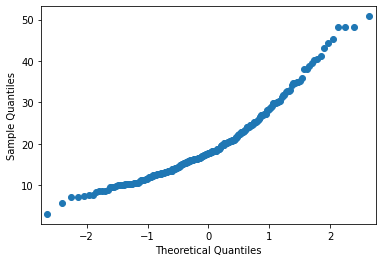

In [38]:
sm.qqplot(X["total_bill"])

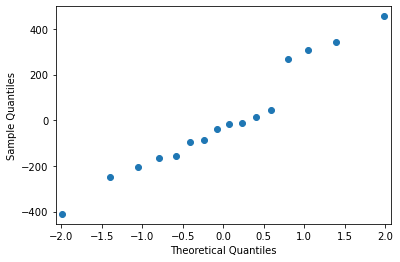

In [29]:
import scipy.stats as stats
fig = sm.qqplot(res, stats.t, distargs=(4,))
plt.show()

In [37]:
import statsmodels
statsmodels.stats.descriptivestats.describe(X)

,const,total_bill,sex,smoker,time,size
nobs,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02
missing,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
mean,1.000000e+00,1.978594e+01,3.565574e-01,3.811475e-01,2.786885e-01,2.569672e+00
std_err,0.000000e+00,3.648529e-02,1.967078e-03,1.994537e-03,1.841293e-03,3.897950e-03
upper_ci,1.000000e+00,1.985745e+01,3.604128e-01,3.850568e-01,2.822974e-01,2.577312e+00
lower_ci,1.000000e+00,1.971443e+01,3.527020e-01,3.772383e-01,2.750797e-01,2.562032e+00
std,0.000000e+00,8.902412e+00,4.799670e-01,4.866670e-01,4.492755e-01,9.510998e-01
iqr,0.000000e+00,1.078000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
iqr_normal,0.000000e+00,7.991226e+00,7.413011e-01,7.413011e-01,7.413011e-01,7.413011e-01
mad,0.000000e+00,6.869440e+00,4.588484e-01,4.717482e-01,4.020425e-01,7.798979e-01
